In [1]:
import numpy as np
import matplotlib.pyplot as plt

def bloch_phase(k, a=1.0):
    return np.exp(1j*k*a)

def build_H8(k, t, v, w, a=1.0):
    H = np.zeros((8,8), dtype=complex)

    def add_intracell(i, j, J):
        i0, j0 = i-1, j-1
        H[i0, j0] += -J
        H[j0, i0] += -J

    # Intra-cell
    add_intracell(1, 2, t)
    add_intracell(3, 4, t)

    add_intracell(1, 4, w)
    add_intracell(2, 3, w)

    add_intracell(1, 8, v)
    add_intracell(2, 5, v)
    add_intracell(4, 7, v)
    add_intracell(3, 6, v)

    # Inter-cell
    z = np.exp(1j*k*a)
    H[6, 7] += -v * z                # (7,8)
    H[7, 6] += -v * z.conjugate()    # (8,7)

    H[5, 4] += -v * z                # (6,5)
    H[4, 5] += -v * z.conjugate()    # (5,6)

    return H

def eigvals_H8(k, t, v, w, a=1.0):
    H = build_H8(k, t, v, w, a)
    vals = np.linalg.eigvalsh(H)
    return np.sort(np.real_if_close(vals))

def bandstructure_1d(t, v, w, a=1.0, nk=401, kmin=-np.pi, kmax=np.pi):
    ks = np.linspace(kmin, kmax, nk)
    bands = np.zeros((nk, 8), dtype=float)
    for i, kk in enumerate(ks):
        bands[i, :] = eigvals_H8(kk, t, v, w, a)
    return ks, bands


import numpy as np

t, v, w, a = 0.0, 0.8, 1.2, 1.0  # Topological insulator
# t, v, w, a = 0.0, 1.2, 0.8, 1.0  # Trivial insulator
# t, v, w, a = 0.0, 1, 1, 1.0  # Metallic phase

ks, bands = bandstructure_1d(t, v, w, a=a, nk=401)

# Example: eigenvalues at Gamma (k=0)
E_gamma = eigvals_H8(0.0, t, v, w, a)
print(E_gamma)


[-1.82462113 -1.82462113 -0.17537887 -0.17537887  0.17537887  0.17537887
  1.82462113  1.82462113]


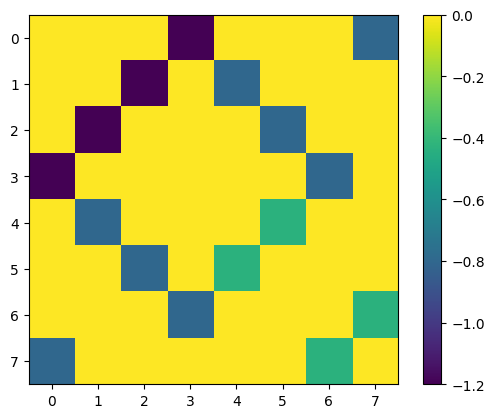

In [2]:
plt.imshow(np.real(build_H8(1, t, v, w, a)))
plt.colorbar()

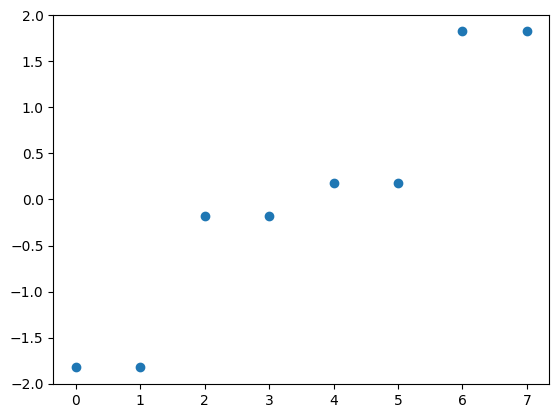

In [3]:
plt.scatter(np.arange(8), E_gamma)

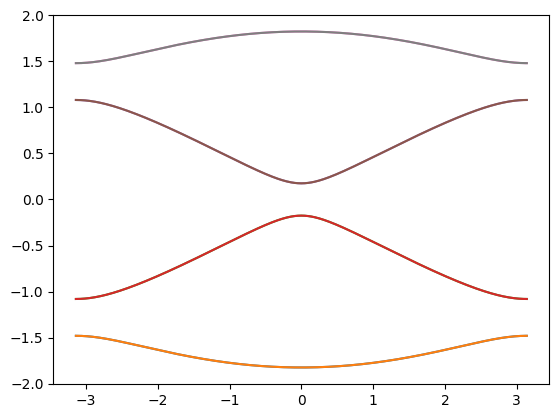

In [4]:
plt.plot(ks, bands )
plt.show()

In [66]:
bands.shape

(401, 8)